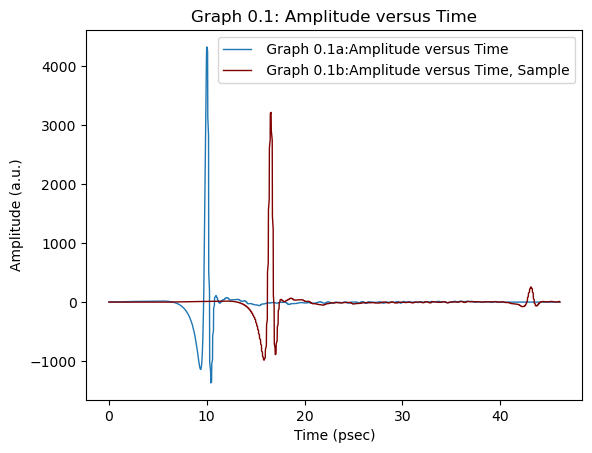

In [2]:
import numpy as np 
import matplotlib.pyplot as plt


# First, I import data from files in the same directory to get the reference and sample data#
data1 = np.loadtxt("AmpTimeRef.txt",dtype=float)
data2 = np.loadtxt("AmpTimeSample.txt",dtype=float)

# The x1,x2 parameter are here multiplied with 1e12 to get the right units (pico-seconds)
x1 = data1[:,0] * 1e12
y1 = data1[:,1]
x2 = data2[:,0] * 1e12
y2 = data2[:,1]

# Interpolate the data to get a common time base
startt = 0
endt = 46.1 #its the end time in picoseconds
dt = min(np.mean(np.diff(x2)), np.mean(np.diff(x1)))
t = np.arange(startt, endt + dt, dt)

sr = np.interp(t, x1, y1, left=0, right=0)
ss = np.interp(t, x2, y2, left=0, right=0)

# Plot Amplitude versus Time for Sample and Reference data
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Time (psec)")
plt.ylabel("Amplitude (a.u.)")
plt.title("Graph 0.1: Amplitude versus Time")
plt.plot(t,sr, linewidth = 1)
plt.plot(t,ss, color = "maroon",  linewidth = 1)
plt.legend([" Graph 0.1a:Amplitude versus Time", " Graph 0.1b:Amplitude versus Time, Sample"])
plt.show()

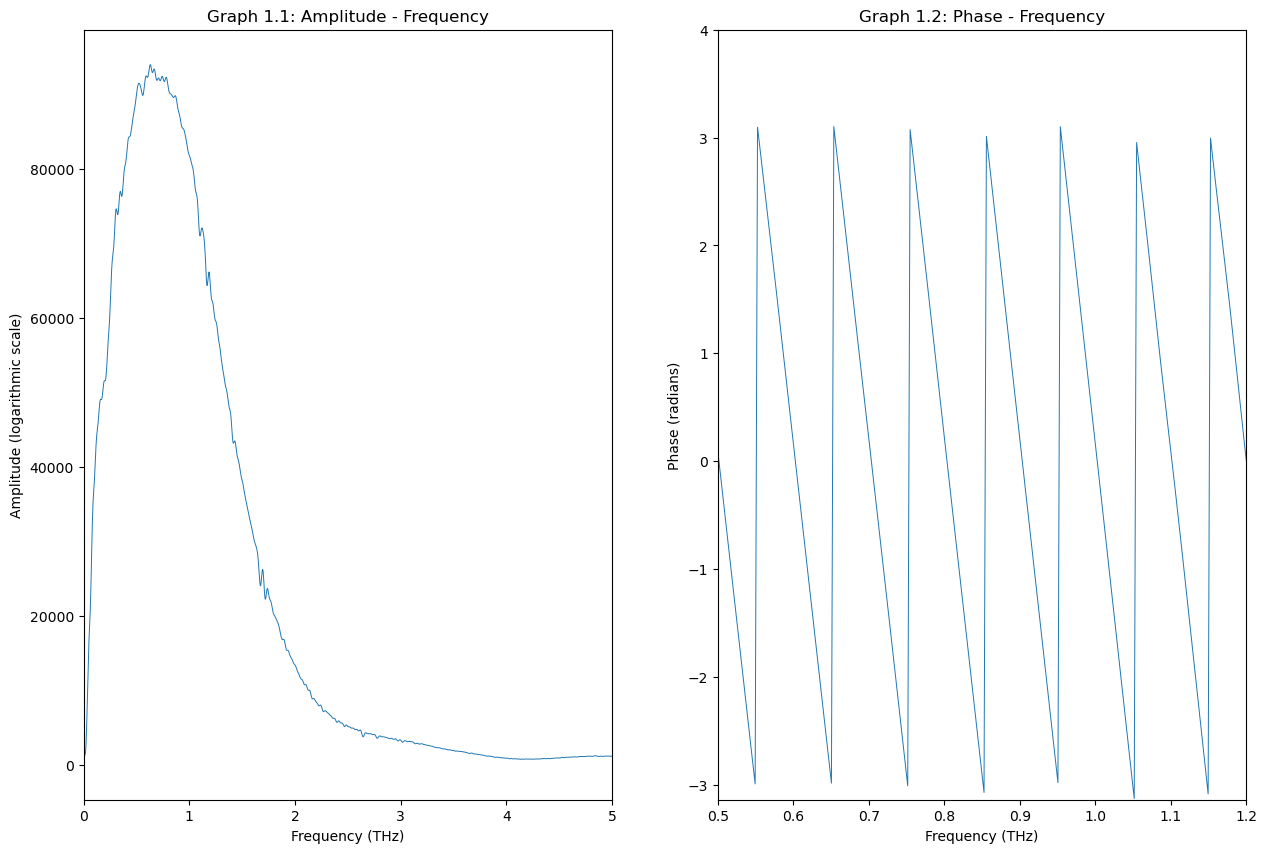

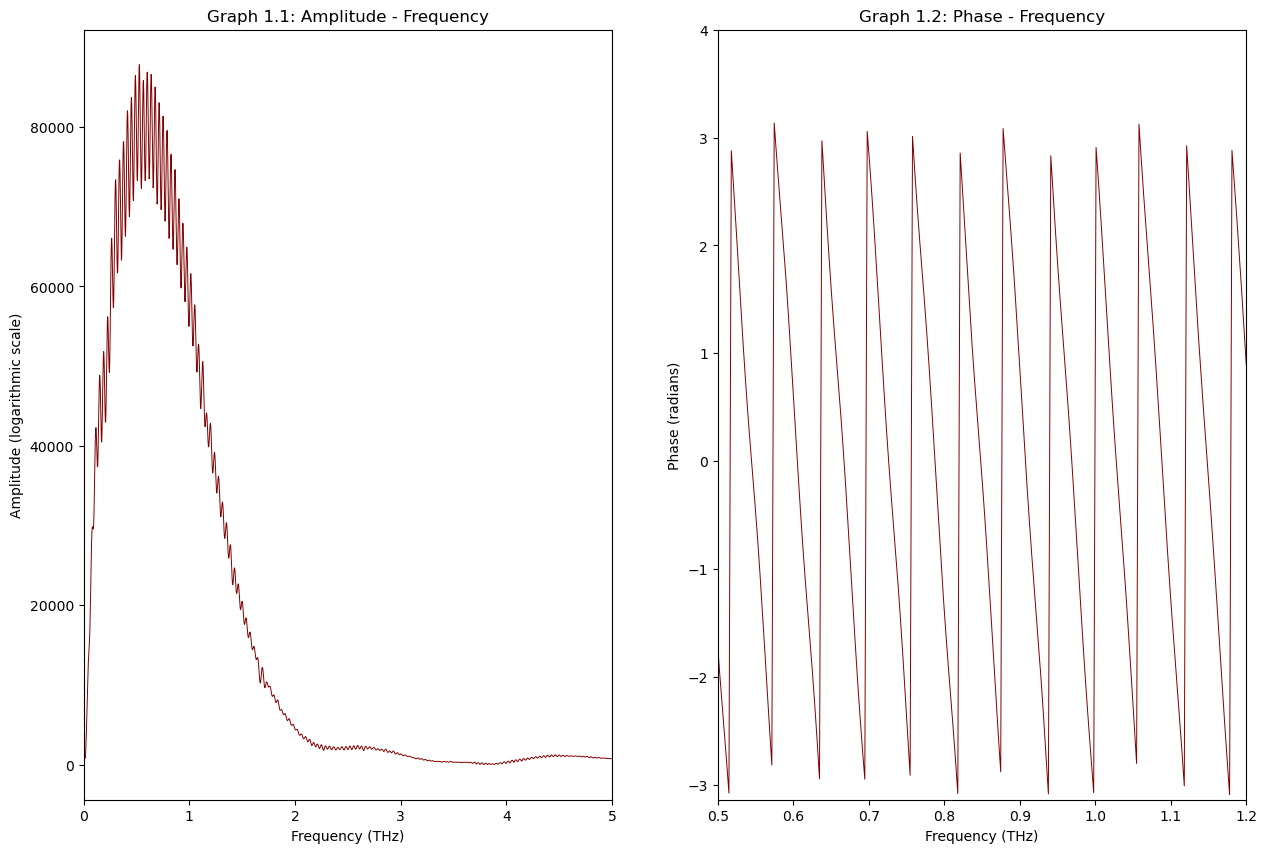

In [3]:
# FFT of the Sample and Reference data
fftr = np.fft.fft(sr, 16384)
ffts = np.fft.fft(ss, 16384)
freq = np.fft.fftfreq(16384, dt) #time to frequency


# Mask Aplication to exclude negative frequencies
mask = (freq >= 0) #& #(freq < 5) #I limit the range of frequencies to 0-5 THz
fftr = fftr[mask]
ffts = ffts[mask]
freq = freq[mask]

# Plot the FFT
# AMPLITUDE REFERENCE
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot((freq),np.abs(fftr), linewidth = 0.7)
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 5, xmin = 0)
plt.title("Graph 1.1: Amplitude - Frequency")
plt.xlabel("Frequency (THz)")
plt.ylabel("Amplitude (logarithmic scale)")
# PHASE REFERENCE
plt.subplot(1,2,2)
plt.plot(freq,(np.angle(fftr)), linewidth = 0.7)
plt.title("Graph 1.2: Phase - Frequency")
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 1.2, xmin = 0.5)
plt.ylim(ymax = 4, ymin = -3.14)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radians)")
plt.show()


# AMPLITUDE SAMPLE
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot((freq),np.abs(ffts), linewidth = 0.7, color = "maroon")
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 5, xmin = 0)
plt.title("Graph 1.1: Amplitude - Frequency")
plt.xlabel("Frequency (THz)")
plt.ylabel("Amplitude (logarithmic scale)")
# PHASE SAMPLE
plt.subplot(1,2,2)
plt.plot(freq,(np.angle(ffts)), linewidth = 0.7, color = "maroon")
plt.title("Graph 1.2: Phase - Frequency")
plt.yscale("linear")
plt.xscale("linear")
plt.xlim(xmax = 1.2, xmin = 0.5)
plt.ylim(ymax = 4, ymin = -3.14)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radians)")
plt.show()



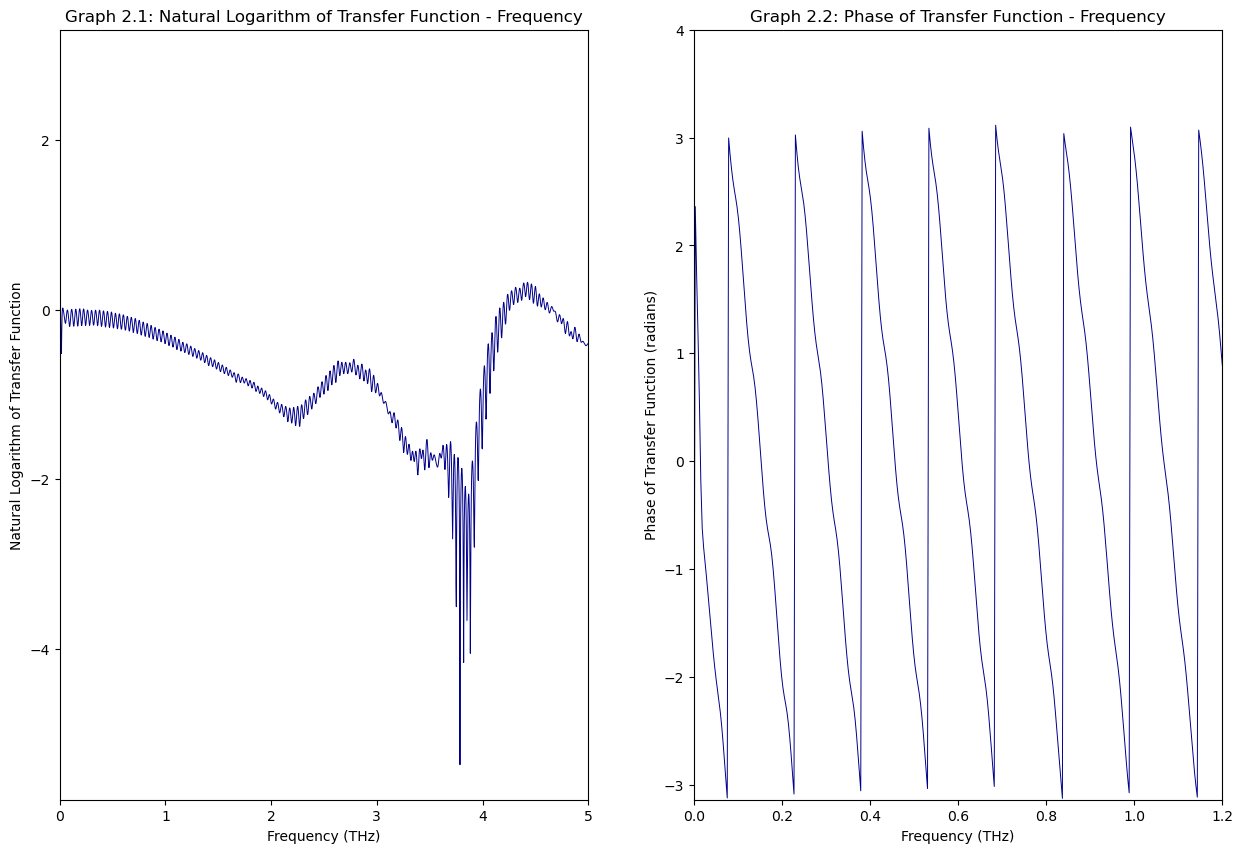

Zero values in xaxishz: False


In [4]:
# Transfer Function
freq[freq == 0] = 1e-12  # Replace zeros with a small value

tamp = (ffts / fftr)
ln_exp = np.log(np.abs(tamp))
tphase = np.angle(tamp)

# Plot the Transfer Function
plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.plot(freq,ln_exp, linewidth = 0.7, color = "darkblue")
plt.title("Graph 2.1: Natural Logarithm of Transfer Function - Frequency")
plt.xscale("linear")
plt.xlim(xmax = 5, xmin = 0)
#plt.ylim(ymax=2)
plt.xlabel("Frequency (THz)")
plt.ylabel("Natural Logarithm of Transfer Function")

plt.subplot(1,2,2)
plt.plot(freq, tphase, linewidth = 0.7, color = "darkblue")
plt.title("Graph 2.2: Phase of Transfer Function - Frequency")
plt.xscale("linear")
plt.xlim(xmax = 1.2, xmin = 0)
plt.ylim(ymax = 4, ymin = -3.14)
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase of Transfer Function (radians)")

plt.show()


print("Zero values in xaxishz:", np.any(freq == 0))
# this line checks if there are any zero values in the xaxishz array

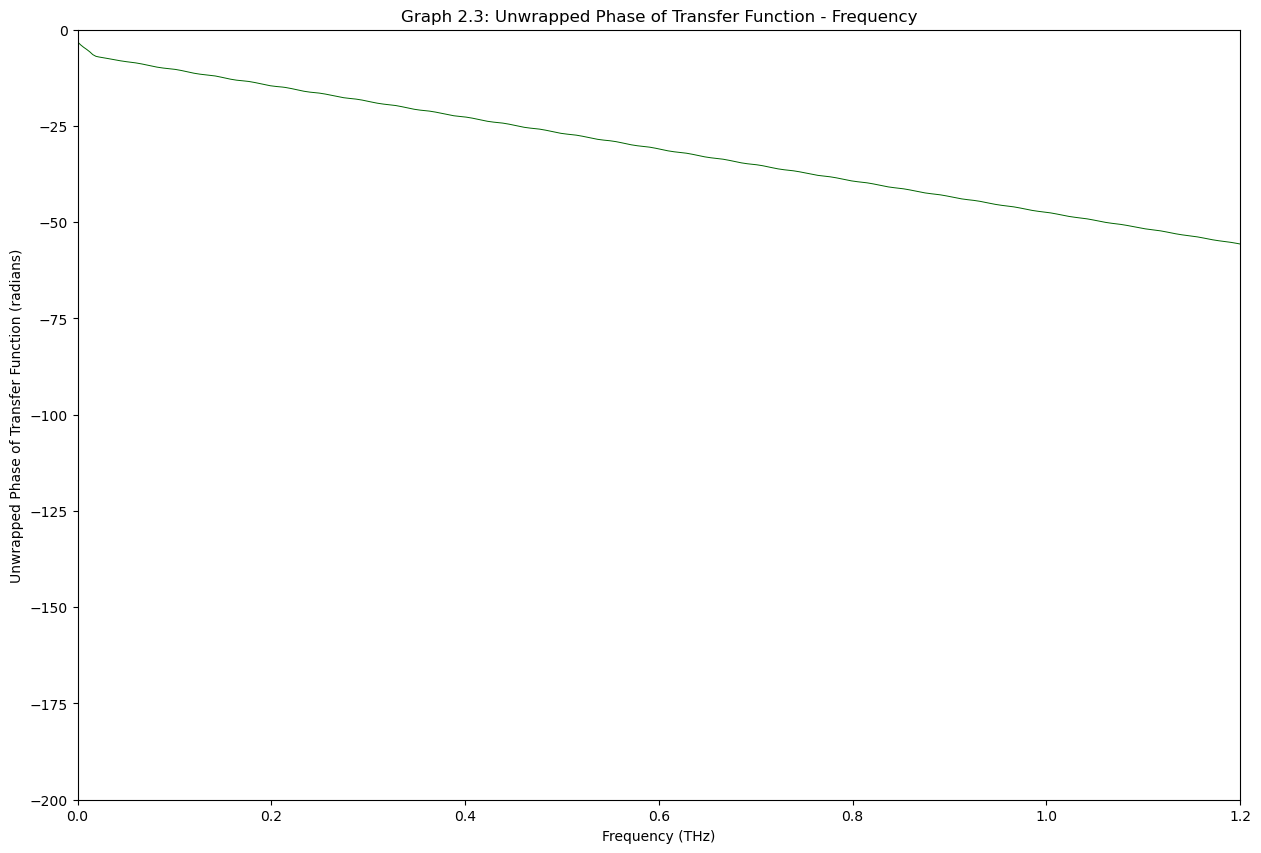

In [5]:
# Phase Unwrapping
tphase_unwrapped = np.unwrap(tphase)
#tphase_unwrapped -= tphase_unwrapped[0]-0.5*np.pi

plt.figure(figsize=(15,10))
plt.plot(freq, tphase_unwrapped, linewidth = 0.7, color ='darkgreen')
plt.title("Graph 2.3: Unwrapped Phase of Transfer Function - Frequency")
plt.xscale("linear")
plt.xlim(xmax = 1.2, xmin = 0)
plt.xlabel("Frequency (THz)")
plt.ylim(ymax=0, ymin = -200)
plt.ylabel("Unwrapped Phase of Transfer Function (radians)")
plt.show()




<Figure size 1000x600 with 0 Axes>

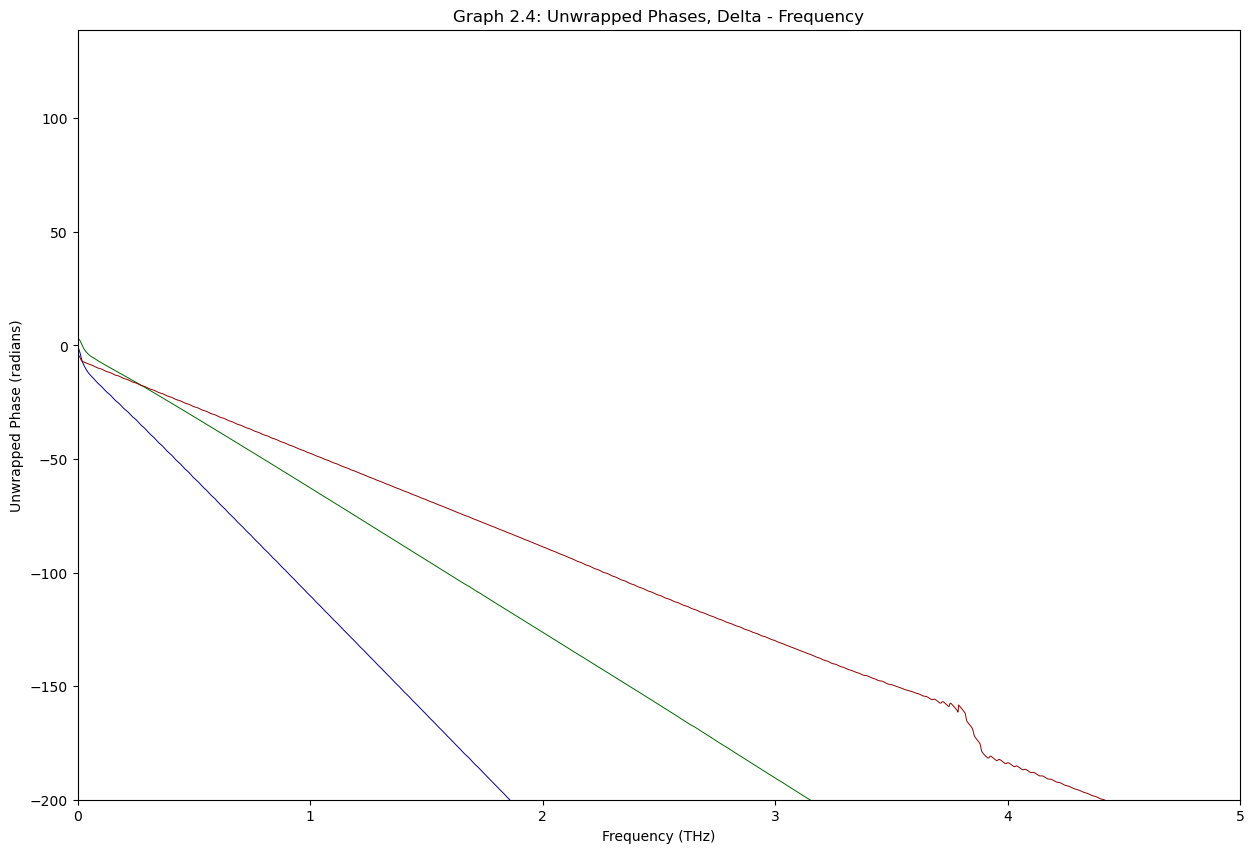

In [6]:
# Unwrapping the phases of the reference and sample FFTs
plt.figure(figsize=(10,6))
uwr = np.unwrap(np.angle(fftr))
uws= np.unwrap(np.angle(ffts))
delta = uws - uwr

plt.figure(figsize=(15,10))
plt.title("Graph 2.4: Unwrapped Phases, Delta - Frequency")
plt.plot(freq, uwr, linewidth = 0.7, color ='darkgreen')
plt.plot(freq, uws, linewidth = 0.7, color ='darkblue')
plt.plot(freq, delta, linewidth = 0.7, color ='darkred')
plt.xscale("linear")
plt.xlabel("Frequency (THz)")   
plt.ylabel("Unwrapped Phase (radians)")
plt.ylim( ymin = -200)
plt.xlim(xmax = 5, xmin = 0)
plt.show()



In [7]:
# Calculation of refractive index n of the sample
# The time difference of the two maxima is approximately 6 picoseconds
dt =  6* 1e-12 #seconds
c = 3e8 #speed of light in m/s
d = 2e-3 #thickness of sample in m
n_0 = 1  # Refractive index of air

navg = 1 + (c * dt) / d
print("The average refractive index is: ", navg)

The average refractive index is:  1.9


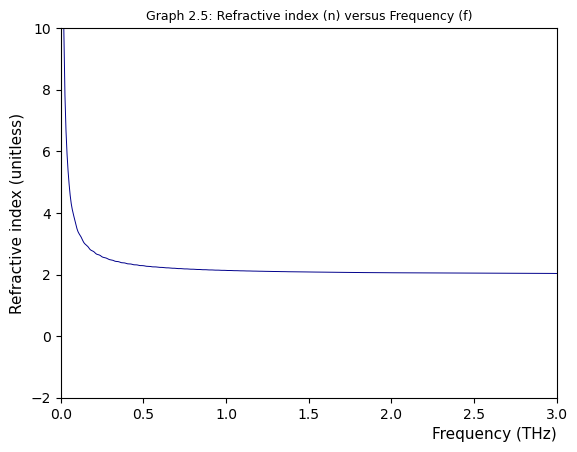

In [8]:
#THEORETICAL CALCULATION OF REFRACTIVE INDEX
n = 1 + (np.abs(delta)* c) / (2 * np.pi * freq * 1e12  * d)

plt.plot( freq, n , color = "darkblue", linewidth = 0.7)
plt.title("Graph 2.5: Refractive index (n) versus Frequency (f)", fontsize = 9)         
plt.xlabel("Frequency (THz)", fontsize = 11, loc = "right")
plt.ylabel("Refractive index (unitless)", fontsize = 11)  
plt.xscale("linear")
plt.yscale("linear")  
plt.xlim(xmax = 3, xmin = 0 )
plt.ylim(ymax = 10, ymin = -2)
plt.show()

10 iterations
10 iterations
9 iterations
10 iterations
11 iterations
9 iterations
10 iterations
9 iterations
9 iterations
9 iterations
10 iterations
10 iterations
10 iterations
10 iterations
10 iterations
9 iterations
10 iterations
9 iterations
9 iterations
10 iterations
9 iterations
9 iterations
9 iterations
9 iterations
10 iterations
9 iterations
8 iterations
9 iterations
8 iterations
9 iterations
9 iterations
8 iterations
9 iterations
8 iterations
9 iterations
8 iterations
9 iterations
8 iterations
9 iterations
8 iterations
9 iterations
9 iterations
9 iterations
8 iterations
8 iterations
9 iterations
9 iterations
8 iterations
8 iterations
8 iterations
8 iterations
8 iterations
7 iterations
8 iterations
8 iterations
7 iterations
7 iterations
7 iterations
8 iterations
7 iterations
8 iterations
9 iterations
8 iterations
8 iterations
8 iterations
8 iterations
8 iterations
7 iterations
8 iterations
8 iterations
8 iterations
8 iterations
7 iterations
7 iterations
8 iterations
8 iterations

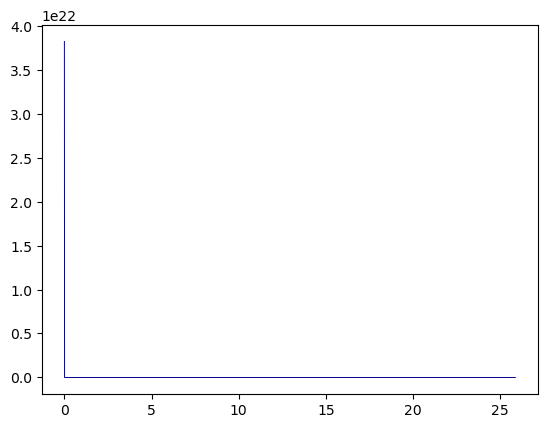

In [9]:
def G_zero(n, f, ln_exp):

    ln_th =(np.log((4 * n_0 * n) / (n_0 + n)**2)
             -(1j * 2 * np.pi * f * d / c) * (n - n_0))
    return  ln_th - ln_exp

def G_zerod(n, f):
    p = 1 / n
    m = 2 / (n + n_0) + (1j * 2 * np.pi* f * d) / c 
    return p - m 

def new_raph(n_1, ln_exp, f, iterations, tol):
    n = n_1
    for i in range(iterations): 
        G_zero_ = G_zero(n,  f, ln_exp)
        G_zerod_ = G_zerod(n, f)
        dn = G_zero_ / G_zerod_
        n = n - dn
        if abs(G_zero_/G_zerod_) < tol:
            print(i, "iterations")
            break
    return n


# Initial guess and computation of the refractive index of the material sample
n_1 = 1.97 + 0.05j
n_ = []

for i, f in enumerate(freq, 0):
    ln_exp = np.log(np.abs(tamp[i])) + 1j * tphase_unwrapped[i]
    n_values = new_raph( n_1 ,ln_exp, f,  iterations=50, tol=1e-10)
    n_.append(n_values)


# print("Refractive index values:", n_)
n_ = np.array(n_)


plt.plot ( freq, np.real(n_), linewidth=0.7, color='darkblue')
#plt.xlim(xmax = 5, xmin = 0)
#plt.ylim(ymax = 10, ymin = -2)
plt.show()

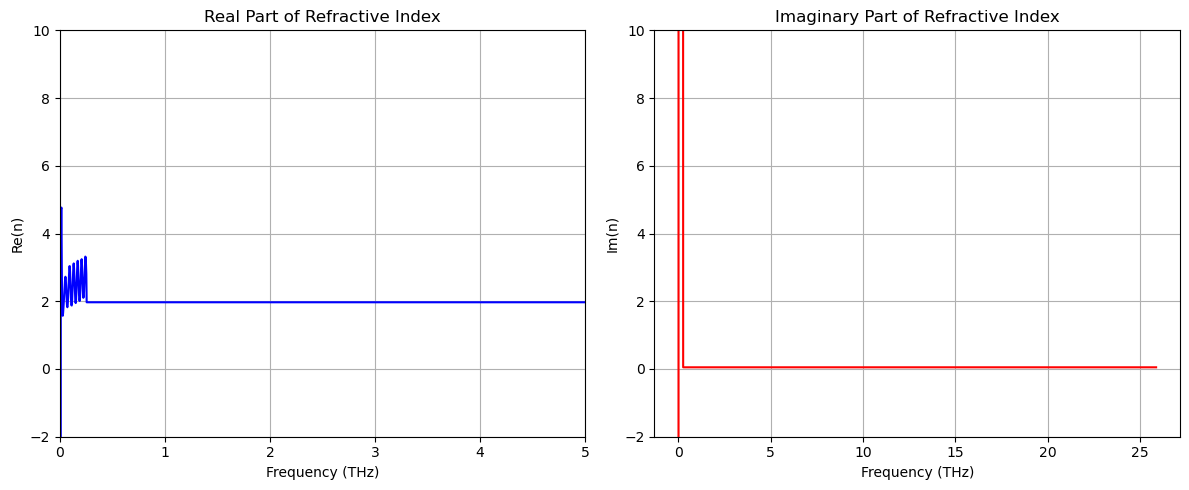

In [ ]:
#NEWTON - RAPHSON METHOD SECOND VERSION
def G_zero(n, f, ln_exp, n_0, d, c):

    ln_th = (np.log((4 * n_0 * n) / (n_0 + n)**2)
             -(1j * 2 * np.pi * f * d / c) * (n - n_0))
    return ln_th - ln_exp

def G_zerod(n, f, n_0, d, c):
    
    p = 1 / n
    m = 2 / (n + n_0) + (1j * 2 * np.pi * f * d / c) 
    return p - m 

def new_raph(n_1, ln_exp, f, n_0, d, c, iterations=50, tol=1e-10):
   
    n = n_1
    for i in range(iterations): 
        try:
            G_zero_ = G_zero(n, f, ln_exp, n_0, d, c)
            G_zerod_ = G_zerod(n, f, n_0, d, c)
            
            # Check for near-zero derivative
            if abs(G_zerod_) < 1e-15:
                return n_1, False
                
            dn = G_zero_ / G_zerod_
            n_new = n - dn
            
            # Check relative change for convergence
            if abs(dn/n) < tol:
                print(f"Converged after {i+1} iterations")
                return n_new, True
                
            # Check for divergence
            if abs(n_new) > 100 or np.isnan(n_new):
                return n, False
                
            n = n_new
            
        except:
            return n_1, False
            
    print("Max iterations reached")
    return n, False

# CALCULATION
n_1 = 1.97 + 0.05j
n_ = []
n_prev = n_1

for i, f in enumerate(freq):
    ln_exp = np.log(np.abs(tamp[i])) + 1j * tphase_unwrapped[i]
    n_value, converged = new_raph(n_prev, ln_exp, f, n_0, d, c)
    n_.append(n_value)
    if converged:
        n_prev = n_value  
n_ = np.array(n_)

# PLOT
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(freq, np.real(n_), 'b-', label='Real part')
plt.xlabel('Frequency (THz)')
plt.ylabel('Re(n)')
plt.title('Real Part of Refractive Index')
plt.ylim(ymax=10, ymin=-2)
plt.xlim(xmax = 5, xmin = 0 )
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(freq, np.imag(n_), 'r-', label='Imaginary part')
plt.xlabel('Frequency (THz)')
plt.ylabel('Im(n)')
plt.title('Imaginary Part of Refractive Index')
plt.ylim(ymax=10, ymin=-2)
plt.grid(True)
plt.tight_layout()
plt.show()
